## From sklearn.datasets load digits dataset and do following

1. Classify digits (0 to 9) using KNN classifier. You can use different values for k neighbors and need to figure out a value of K that gives you a maximum score.
2. You can manually try different values of K or use gridsearchcv
3. Plot confusion matrix
4. Plot classification report

In [8]:
from sklearn.datasets import load_digits
import pandas as pd
digit = load_digits()

In [6]:
dir(digit)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [10]:
X = digit.data
y = digit.target

In [26]:
from sklearn.model_selection import train_test_split, GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2
)

In [75]:
len(X_test)

360

In [43]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()


In [34]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],     # different k values
    'weights': ['uniform', 'distance'], # weight strategy
    'metric': ['euclidean', 'manhattan'] # distance metric
}

grd = GridSearchCV(knn, param_grid, cv=5)
grd.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']})

In [38]:
grd.best_params_

{'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}

### now train model with best params

In [47]:
knnM = KNeighborsClassifier(metric='euclidean', n_neighbors=3, weights='uniform')
knnM.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [49]:
knnM.score(X_test, y_test)

0.9861111111111112

### Draw classification report

In [61]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns 
y_pred = knnM.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[36,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 37,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 43,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 38,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 44,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 33,  1,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 33,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 30,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 27,  0],
       [ 0,  0,  0,  1,  1,  1,  0,  0,  0, 34]], dtype=int64)

<Axes: >

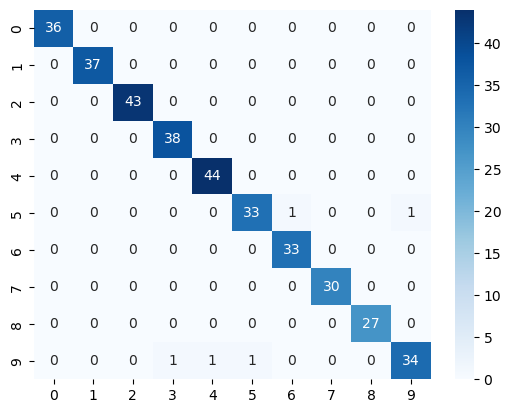

In [58]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

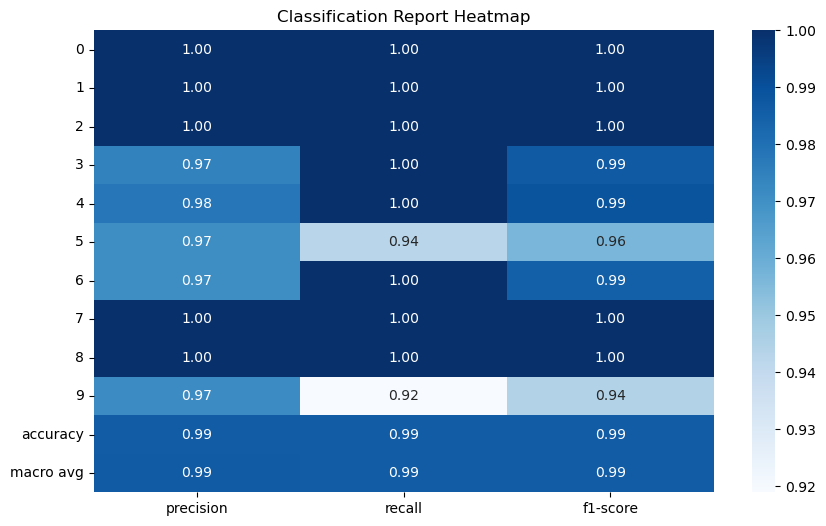

In [69]:
report = classification_report(y_test, y_pred, output_dict=True)

# Convert to DataFrame
df1 = pd.DataFrame(report).transpose()

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df1.iloc[:-1, :-1], annot=True, cmap="Blues", fmt=".2f")
plt.title("Classification Report Heatmap")
plt.show()

In [77]:
df1

,precision,recall,f1-score,support
0,1.000000,1.000000,1.000000,36.000000
1,1.000000,1.000000,1.000000,37.000000
2,1.000000,1.000000,1.000000,43.000000
3,0.974359,1.000000,0.987013,38.000000
4,0.977778,1.000000,0.988764,44.000000
5,0.970588,0.942857,0.956522,35.000000
6,0.970588,1.000000,0.985075,33.000000
7,1.000000,1.000000,1.000000,30.000000
8,1.000000,1.000000,1.000000,27.000000
9,0.971429,0.918919,0.944444,37.000000
